# TP réalisé par : 

* LABCHRI Amayas
* KOULAL Yidhir Aghiles
* BAROUD Yasmine
* SENNIA Mohamed

# TP 5 Réseaux de neurones - Multi classification et Propagation en avant
Dans ce TP, nous aimerions faire une classification multiclasse. Pour ce faire, nous allons comparer entre une classification utilisant la regression logistique, et une classification en utilisant les réseaux de neurones.

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2 

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)


In [4]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

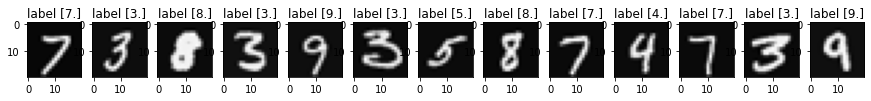

In [5]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Partie 1, régression logistique
Dans cette partie, nous aimerions utiliser la régression logistique pour classifier nos images

Rappelons que la régression logistique nous donne la probabilité d'appartenance (oui ou non) à la classe 1 (elle permet une classification binaire).

Pour étendre la régression logistique à une multi-classification, nous allons utiliser une stratégie 1 contre tous.

Nous paramètres $\theta$ seront donc une matrice avec un nombre de lignes égale au nombre de classes, et avec un nombre de colones égale au nombre decaractéristiques (chaque ligne de la matrice $\theta$ correspond aux paramètres d'un classifieur.

In [6]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));

In [7]:
k = Sigmoid(-10)
k

4.5397868702434395e-05

In [8]:
# calculer le cout
def ComputCostReg(X,y,theta, lambdaa):
  m = len(y)
  h = Sigmoid(X.dot())
  return (-1/m) * (np.sum((y * np.log(h ) ) + ((1 - y) * np.log(1 - h ))))  + ((lambdaa / 2*m) * (np.sum(theta)**2))


In [9]:
# calcule du gradient 
def Gradient(X,y,theta):
    m = len(y)
    h = Sigmoid(X.dot(theta))
    return ((1 / m) * (X.T.dot(h- y )))

def Gradient2(X, y,theta,lambdaa):
    m = len(y)
    h = Sigmoid(X.dot(theta))
    return ((1 / m) * (X.T.dot(h- y ))) + ((lambdaa/m)*(theta))

In [10]:
def lrCostFunction (X, y, initial_theta, alpha, MaxIter,lambda_):
    # dans cette fonction nous avons appliquer la regression logistique avec tout ce que ceci implique
    # calcul du coût, minimisation du coût avec descente du gradient, et retour des paramètres theta pour une classe
    m = len(y)
    theta = np.copy(initial_theta)
    h = Sigmoid(X.dot(initial_theta))
    for iter in range(MaxIter):

      G1 = Gradient(X,y,theta)
      G2 = Gradient2(X, y, theta, lambda_)
      for i in range(len(theta)):
        if (i==0):
          theta[i] = theta[i] - alpha * G1[i]
        else:
          theta[i] = theta[i] - alpha * G2[i]

    return theta


In [11]:

def predictOnveVsAll (all_theta, X):
    # ici en utilisant les paramètres calculés par la régression logisitique, 
    # nous aiemrions retourner les etiquettes predites
    
    # Ici chaque classifieur retournera de probabilité, il faudra choisir 
    # la probabilité maximale 
    # de tous les classifieurs d'une exemple donné
    # répeter pour tous les exmemples (axis =1)
    y_pred = Sigmoid(np.matmul(X, np.transpose(all_theta)))  # la probabilite qu'un exemple xi appartient a la classe theta[i]
    
    return np.argmax(y_pred, axis =1) #on prend l'indice de la valeur maximal et on va le chercher dans la class

In [12]:
classes= np.unique(y)
number_classes=classes.shape[0]
all_theta = np.zeros((number_classes, X.shape[1]));
all_theta.shape

(10, 401)

In [13]:
MaxIter= 1000
lambda_= 0.1
alpha = 0.01
# initial_theta pour chaque classifieur
initial_theta=np.zeros((X.shape[1], 1));
for i in range (number_classes):
     # appel pour chaque classifieur
     theta = lrCostFunction(X,(y==classes[i]).astype(int),initial_theta,alpha, MaxIter,lambda_);
     all_theta[i,:]=theta.reshape(-1);                      

In [14]:
y_pred = predictOnveVsAll (all_theta, X);

In [15]:
print(y_pred)

[0 0 8 ... 9 9 0]


# Qualité du classifieur RL

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [16]:
def precision(y_pred,y): # fonction qui permet de calculer la precision de notre classifieur
  count = 0 
  for i in range(len(y)):
    if (y_pred[i] == y[i]):
      count = count + 1 
  return count/len(y_pred)

In [17]:
precision_ = precision(y_pred, y)*100
print(" pourcentage de precesion = ", precision_)


 pourcentage de precesion =  84.14


# Partie 2: Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [18]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [19]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [20]:
input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10;

**Prédiction**

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [21]:
def predict(W1, W2, X):

    
  X2=Sigmoid(np.matmul(X,np.transpose(W1))) #on multiplie la couche entree par les poids w1

  intercept = np.ones((X.shape[0], 1))
  X2 = np.column_stack((intercept, X2)) # ici il faut ajouter la colonne des 1 avant la deuxieme couche

  output=Sigmoid(np.matmul(X2,np.transpose(W2)))  #ensuite on multiplie la couche cachee par les poids w2

  y_predict = np.argmax(output, axis=1)[:, np.newaxis] #on prend l'indice de la valeur maximal et on va le chercher dans la classe
  y_predict = (y_predict + 1)%10 # rectifier l'indexation des etiquetes

  return y_predict

In [22]:
predict (W1, W2, X)

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=int64)

In [23]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred = predict (W1, W2, X)
precisionn = precision(y,y_pred)*100
print("notre precision : {0}".format(precisionn)) # on remarque qu'on a eu une bonne precesion 

notre precision : 97.52


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
# from sklearn.linear_model import LinearRegression, LogisticRegression

clf = LogisticRegression()
clf.fit(X,y)

for k in range(10):
  print("Classe Numero: {0}".format(k))
  print("theta(sklearn) 0 : {0:0.3f} \t\t theta (RN) 0 : {1:0.3f} ".format(clf.intercept_[0],all_theta[k][0]))
  for i in range(1,len(clf.coef_[0])):
    print("\t theta(sklearn) {0} : {1:0.3f} \t\t notre theta(RN) {2} : {3:0.3f}".format(i,clf.coef_[0][i],i,all_theta[k][i]))

In [25]:
precision2 = precision(y, clf.predict(X)) *100
print("sklern precision ",precision2) 

sklern precision  96.22
